In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,10)
data=pd.read_csv('headbrain.csv')
data.head()


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [19]:
data.tail()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [20]:
x=data['Head Size(cm^3)'].values
y=data['Brain Weight(grams)'].values
n=len(x)


In [21]:
#y=mx+c
mean_x=np.mean(x)
mean_y=np.mean(y)
upper=0
lower=0
for i in range(n):
    upper+=(x[i]-mean_x)*(y[i]-mean_y)
    lower+=(x[i]-mean_x)**2
m=upper/lower
#c=y-mx
c=mean_y-(m*mean_x)
print(m,c)



0.26342933948939945 325.57342104944223


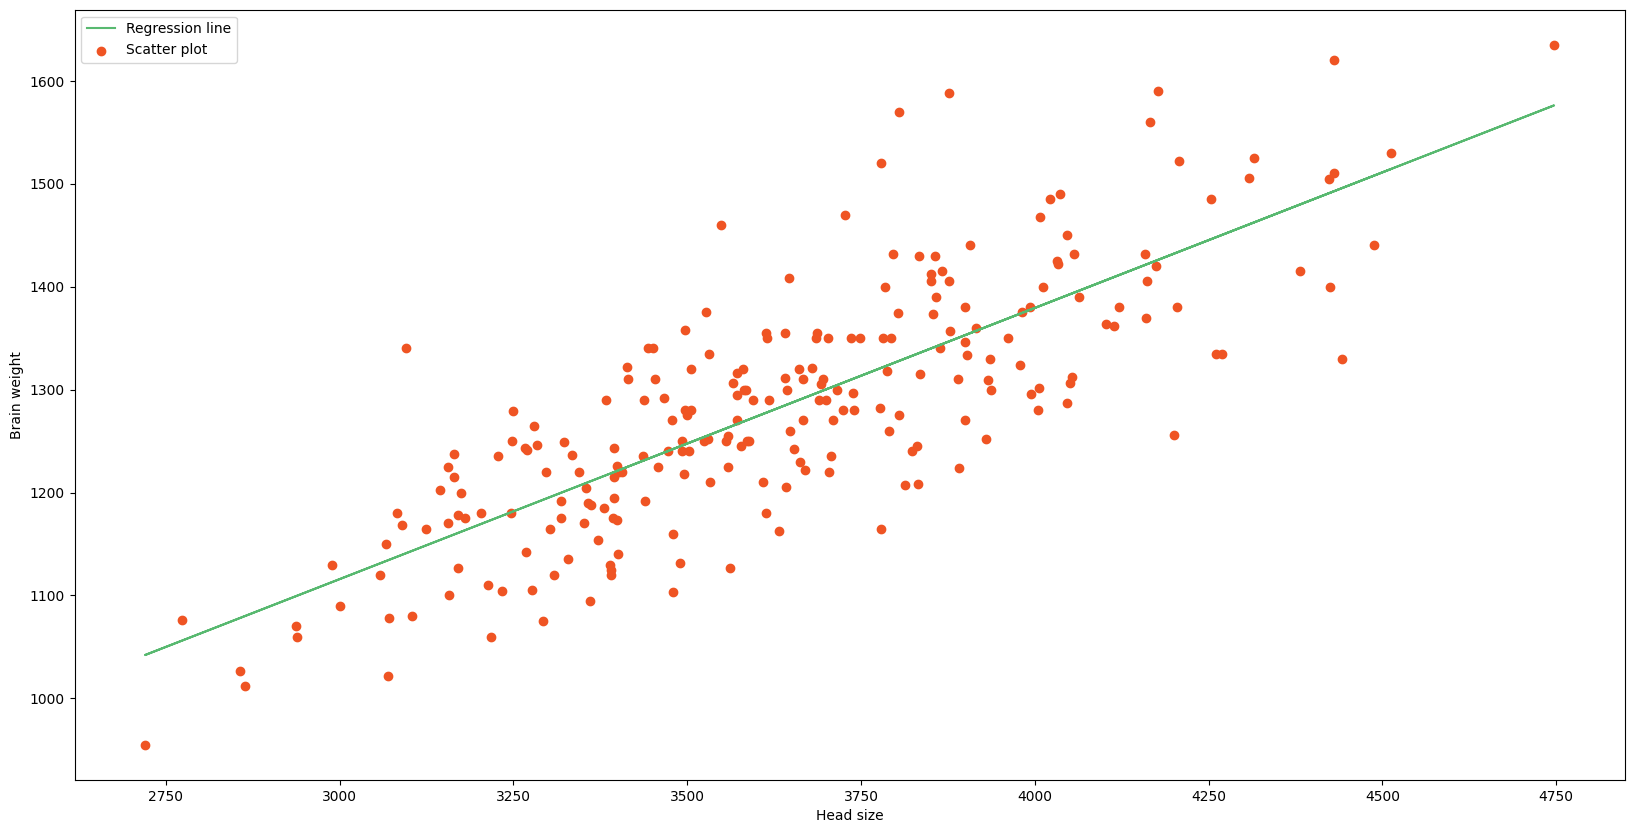

In [29]:
# Calculate predicted y values using the regression equation
predicted_y = m * x + c

# Plot the regression line using the predicted values
plt.plot(x, predicted_y, color='#58b970', label='Regression line')

# Plot the scatter plot
plt.scatter(x, y, c='#ef5423', label='Scatter plot')

plt.xlabel('Head size')
plt.ylabel('Brain weight')
plt.legend()
plt.show()


In [30]:
numerator=0
denominator=0
for i in range(n):
    y_pred=(m*x[i])+c
    numerator+=(y[i]-y_pred)**2
    denominator+=(y[i]-mean_y)**2
R=1-(numerator/denominator)
print(R)    

0.6393117199570003


In [46]:
# Normalize input data
x_mean = np.mean(x)
x_std = np.std(x)
y_mean = np.mean(y)
y_std = np.std(y)
x_normalized = (x - x_mean) / x_std
y_normalized = (y - y_mean) / y_std

# Initialize parameters
m = 0  # initial slope
c = 0  # initial intercept
learning_rate = 0.001  # reduced learning rate
epochs = 1000  # number of iterations

# Gradient descent
for _ in range(epochs):
    y_pred = m * x_normalized + c
    # Compute gradients
    dm = (-2/n) * np.sum(x_normalized * (y_normalized - y_pred))  # gradient w.r.t. slope
    dc = (-2/n) * np.sum(y_normalized - y_pred)  # gradient w.r.t. intercept
    # Update parameters
    m -= learning_rate * dm
    c -= learning_rate * dc

# De-normalize parameters
m *= y_std / x_std
c = y_mean - m * x_mean

# Calculate R-squared
y_pred = m * x + c
numerator = np.sum((y - y_pred) ** 2)
denominator = np.sum((y - np.mean(y)) ** 2)
R_squared = 1 - (numerator / denominator)
print("R-squared:", R_squared)


R-squared: 0.6276491237110169
